#### Create by Sangkv
#### Date: 2020/09/11
#### Email: sangkimit@gmail.com

## Xác định bài toán và giải thuật:
### 1. Input: Dữ liệu X và số lượng cluster cần tìm K
### 2. Output: Các center M và label vector cho từng điểm dữ liệu Y

### 3. Giải thuật:
### B1: Chọn K điểm bất kỳ làm các center ban đầu
### B2: Phân mỗi điểm dữ liệu vào cluster có center gần nó nhất (sử dụng độ đo euclidean)
### B3: Nếu việc gán dữ liệu vào từng cluster ở bước 2 mà không làm thay đổi so với vòng lặp trước nó (không giảm loss) thì ta dừng thuật toán.
### B4: Cập nhật center cho từng cluster bằng cách lấy trung bình cộng của tất cả các điểm dữ liệu đã được gán vào cluster đó sau bước 2 (Cũng giống như tìm tọa độ trọng tâm của tam giác ABC khi biết tọa độ các điểm A, B, C). Điều này có được nhờ tính đạo hàm hàm loss.
### B5: Quay lại B2

In [1]:
# Khai báo các thư viện cần dùng
from __future__ import print_function
import numpy as np 
import matplotlib.pyplot as plt 
from scipy.spatial.distance import cdist
np.random.seed(11)

In [2]:
# Tạo dữ liệu bằng cách lấy các điểm theo phân phối chuẩn có kỳ vọng tại các điểm (2,2), (8,3), (3, 6)
# Mỗi cluster có 500 điểm
means = [[2, 2], [8, 3], [3, 6]]
cov = [[1, 0], [0,1]]
N = 500
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X2 = np.random.multivariate_normal(means[2], cov, N)

X = np.concatenate((X0, X1, X2), axis = 0)
K = 3
original_label = np.asarray([0]*N + [1]*N + [2]*N).T 

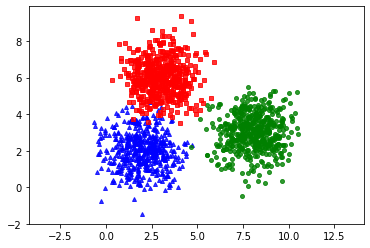

In [3]:
# Hiển thị dữ liệu trên đồ thị
def kmeans_display(X, label):
    K = np.amax(label) + 1
    X0 = X[label == 0, :]
    X1 = X[label == 1, :]
    X2 = X[label == 2, :]

    plt.plot(X0[:, 0], X0[:, 1], 'b^', markersize = 4, alpha = .8)
    plt.plot(X1[:, 0], X1[:, 1], 'go', markersize= 4, alpha = .8 )
    plt.plot(X2[:, 0], X2[:, 1], 'rs', markersize = 4, alpha = .8)

    plt.axis('equal')
    plt.plot()
    plt.show()

kmeans_display(X, original_label)

In [4]:
# Các hàm số cần thiết cho K-means clustering

def kmeans_init_centers(X, k):
    # randomly pick k rows of X as initial centers
    return X[np.random.choice(X.shape[0], k, replace = False)]

def kmeans_assign_labels(X, centers):
    # calculate pairwise  distances btw data and centers
    D = cdist(X, centers)
    # return index of the closest center
    return np.argmin(D, axis = 1)

def kmeans_update_centers(X, labels, K):
    centers = np.zeros((K, X.shape[1]))
    for k in range(K) :
        # collect all points assigned to the k-th cluster
        Xk = X[labels == k, :]
        # take average
        centers[k, :] = np.mean(Xk, axis = 0)
    return centers

def has_converged(centers, new_centers): 
    # return True if two sets of centers are the same
    return (set([tuple(a) for a in centers]) == set([tuple(a) for a in new_centers]))

# Phần chính của K-means clustering
def kmeans(X,K): 
    centers = [kmeans_init_centers(X,K)]
    labels = []
    it = 0
    while True:
        labels.append(kmeans_assign_labels(X, centers[-1]))
        new_centers = kmeans_update_centers(X, labels[-1], K)
        if has_converged(centers[-1], new_centers):
            break
        centers.append(new_centers)
        it += 1
    return (centers, labels, it)

centers found  by  our  algorithm:
[[2.99084705 6.04196062]
 [1.97563391 2.01568065]
 [8.03643517 3.02468432]]


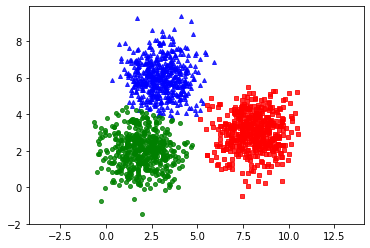

In [5]:
# Áp dụng thuật toán vừa viết vào dữ liệu ban đầu, hiển thị kết quả cuối cùng

(centers, labels, it) = kmeans(X, K)
print('centers found  by  our  algorithm:')
print(centers[-1])

kmeans_display(X, labels[-1])

## Sử dụng thư viện scikit-learn cho K-means

Centers found by scikit-learn:
[[8.0410628  3.02094748]
 [2.99357611 6.03605255]
 [1.97634981 2.01123694]]


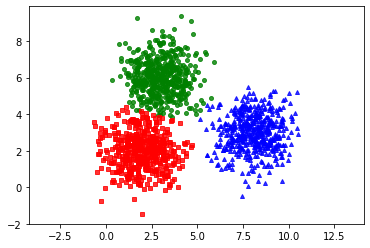

In [6]:
# Kết quả bằng thư viện scikit-learn
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(X)
print('Centers found by scikit-learn:')
print(kmeans.cluster_centers_)
pred_label = kmeans.predict(X)
kmeans_display(X, pred_label)

## Phân nhóm chữ số viết tay MNIST

In [8]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [23]:
# This function visualizes filters in matrix A. Each column of A is a
# filter. We will reshape each column into a square image and visualizes
# on each cell of the visualization panel.
# All other parameters are optional, usually you do not need to worry
# about it.
# opt_normalize: whether we need to normalize the filter so that all of
# them can have similar contrast. Default value is true.
# opt_graycolor: whether we use gray as the heat map. Default is true.
# opt_colmajor: you can switch convention to row major for A. In that
# case, each row of A is a filter. Default value is false.
# source: https://github.com/tsaith/ufldl_tutorial

def display_network(A, m = -1, n = -1):
    opt_normalize = True
    opt_graycolor = True

    # Rescale
    A = A - np.average(A)

    # Compute rows & cols
    (row, col) = A.shape
    sz = int(np.ceil(np.sqrt(row)))
    buf = 1
    if m < 0 or n < 0:
        n = np.ceil(np.sqrt(col))
        m = np.ceil(col / n)
        

    image = np.ones(shape=(buf + m * (sz + buf), buf + n * (sz + buf)))

    if not opt_graycolor:
        image *= 0.1

    k = 0

    for i in range(int(m)):
        for j in range(int(n)):
            if k >= col:
                continue

            clim = np.max(np.abs(A[:, k]))

            if opt_normalize:
                image[buf + i * (sz + buf):buf + i * (sz + buf) + sz, buf + j * (sz + buf):buf + j * (sz + buf) + sz] = \
                    A[:, k].reshape(sz, sz) / clim
            else:
                image[buf + i * (sz + buf):buf + i * (sz + buf) + sz, buf + j * (sz + buf):buf + j * (sz + buf) + sz] = \
                    A[:, k].reshape(sz, sz) / np.max(np.abs(A))
            k += 1

    return image

def display_color_network(A):
    """
    # display receptive field(s) or basis vector(s) for image patches
    #
    # A         the basis, with patches as column vectors
    # In case the midpoint is not set at 0, we shift it dynamically
    :param A:
    :param file:
    :return:
    """
    if np.min(A) >= 0:
        A = A - np.mean(A)

    cols = np.round(np.sqrt(A.shape[1]))

    channel_size = A.shape[0] / 3
    dim = np.sqrt(channel_size)
    dimp = dim + 1
    rows = np.ceil(A.shape[1] / cols)

    B = A[0:channel_size, :]
    C = A[channel_size:2 * channel_size, :]
    D = A[2 * channel_size:3 * channel_size, :]

    B = B / np.max(np.abs(B))
    C = C / np.max(np.abs(C))
    D = D / np.max(np.abs(D))

    # Initialization of the image
    image = np.ones(shape=(dim * rows + rows - 1, dim * cols + cols - 1, 3))

    for i in range(int(rows)):
        for j in range(int(cols)):
            # This sets the patch
            image[i * dimp:i * dimp + dim, j * dimp:j * dimp + dim, 0] = B[:, i * cols + j].reshape(dim, dim)
            image[i * dimp:i * dimp + dim, j * dimp:j * dimp + dim, 1] = C[:, i * cols + j].reshape(dim, dim)
            image[i * dimp:i * dimp + dim, j * dimp:j * dimp + dim, 2] = D[:, i * cols + j].reshape(dim, dim)

    image = (image + 1) / 2

    #PIL.Image.fromarray(np.uint8(image * 255), 'RGB').save(filename)

    return image

In [26]:
# Data Preprocessing
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1] * x_test.shape[2])
print(x_test.shape)

(10000, 784)


In [30]:
X0 = np.asarray(x_test)[:1000,:]/255.0
X = X0

K = 10
kmeans = KMeans(n_clusters=K).fit(X)

pred_label = kmeans.predict(X)

<class 'numpy.ndarray'>
(784, 10)


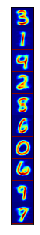

c:\users\sang\anaconda3\envs\tensor1\lib\site-packages\ipykernel_launcher.py:21: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.


In [31]:
print(type(kmeans.cluster_centers_.T))
print(kmeans.cluster_centers_.T.shape)
A = display_network(kmeans.cluster_centers_.T, K, 1)

f1 = plt.imshow(A, interpolation='nearest', cmap = "jet")
f1.axes.get_xaxis().set_visible(False)
f1.axes.get_yaxis().set_visible(False)
plt.show()
# plt.savefig('a1.png', bbox_inches='tight')


# a colormap and a normalization instance
cmap = plt.cm.jet
norm = plt.Normalize(vmin=A.min(), vmax=A.max())

# map the normalized data to colors
# image is now RGBA (512x512x4) 
image = cmap(norm(A))

import scipy.misc
scipy.misc.imsave('./data/aa.png', image)

In [32]:
print(type(pred_label))
print(pred_label.shape)
print(type(X0))

<class 'numpy.ndarray'>
(1000,)
<class 'numpy.ndarray'>


In [34]:
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import normalize

# Chọn một vài ảnh từ mỗi cụm
N0 = 20;
X1 = np.zeros((N0*K, 784))
X2 = np.zeros((N0*K, 784))

for k in range(K):
    Xk = X0[pred_label == k, :]

    center_k = [kmeans.cluster_centers_[k]]
    neigh = NearestNeighbors(N0).fit(Xk)
    dist, nearest_id  = neigh.kneighbors(center_k, N0)
    
    X1[N0*k: N0*k + N0,:] = Xk[nearest_id, :]
    X2[N0*k: N0*k + N0,:] = Xk[:N0, :]

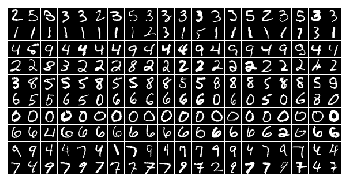

In [35]:
plt.axis('off')
A = display_network(X2.T, K, N0)
f2 = plt.imshow(A, interpolation='nearest' )
plt.gray()
plt.show()

# import scipy.misc
# scipy.misc.imsave('bb.png', A)


# plt.axis('off')
# A = display_network(X1.T, 10, N0)
# scipy.misc.imsave('cc.png', A)
# f2 = plt.imshow(A, interpolation='nearest' )
# plt.gray()

# plt.show()

## Segmentation and Compression

In [36]:
import matplotlib.image as mpimg

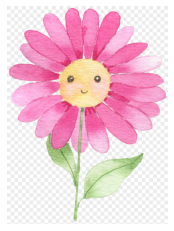

In [41]:
#img = mpimg.imread('data/girl3.jpg')
img = mpimg.imread('data/sun_flower.png')
plt.imshow(img)
imgplot = plt.imshow(img)
plt.axis('off')
plt.show()

In [43]:
X = img.reshape((img.shape[0]*img.shape[1], img.shape[2]))

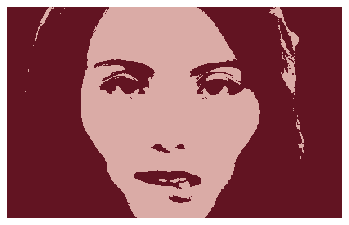

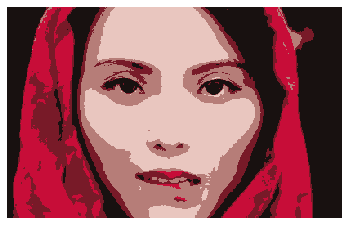

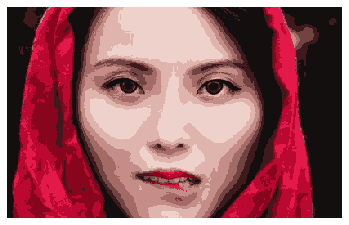

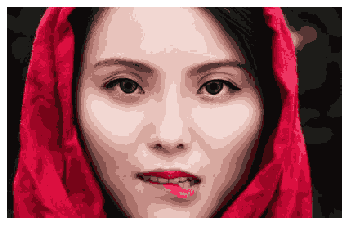

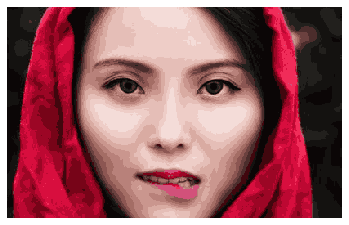

In [39]:
# Số lượng cluster khác nhau

for K in [2, 5, 10, 15, 20]:
    kmeans = KMeans(n_clusters=K).fit(X)
    label = kmeans.predict(X)

    img4 = np.zeros_like(X)
    # replace each pixel by its center
    for k in range(K):
        img4[label == k] = kmeans.cluster_centers_[k]
    # reshape and display output image
    img5 = img4.reshape((img.shape[0], img.shape[1], img.shape[2]))
    plt.imshow(img5, interpolation='nearest')
    plt.axis('off')
    plt.show()

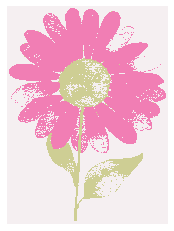

In [50]:
for K in [3]:
    kmeans = KMeans(n_clusters=K).fit(X)
    label = kmeans.predict(X)

    img4 = np.zeros_like(X)
    # replace each pixel by its center
    for k in range(K):
        img4[label == k] = kmeans.cluster_centers_[k]
    # reshape and display output image
    img5 = img4.reshape((img.shape[0], img.shape[1], img.shape[2]))
    plt.imshow(img5, interpolation='nearest')
    plt.axis('off')
    plt.show()